# Récupération des données

In [2]:
import pandas
import csv
from pandas import DataFrame, read_csv
import matplotlib
import matplotlib.pyplot as plt
import umap
import numpy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)

In [3]:
test_set = read_csv('test.csv')

In [4]:
trainfull_set = read_csv('trainfull.csv')

## Informations sur les données

In [5]:
trainfull_set.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [6]:
trainfull_set.shape

(60000, 785)

In [7]:
test_set.shape

(10000, 785)

In [8]:
trainfull_set.head

<bound method NDFrame.head of        label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  ...  \
0          2       0       0       0       0       0       0       0       0       0  ...   
1          9       0       0       0       0       0       0       0       0       0  ...   
2          6       0       0       0       0       0       0       0       5       0  ...   
3          0       0       0       0       1       2       0       0       0       0  ...   
4          3       0       0       0       0       0       0       0       0       0  ...   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...     ...  ...   
59995      9       0       0       0       0       0       0       0       0       0  ...   
59996      1       0       0       0       0       0       0       0       0       0  ...   
59997      8       0       0       0       0       0       0       0       0       0  ...   
59998      8       0       0       0    

## Classification codes
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot 

In [9]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Classification des données

In [10]:
Y_train = trainfull_set['label']
X_train = trainfull_set.drop('label', axis=1)

In [11]:
reducer = umap.UMAP()
data_number = 60000
embedding = reducer.fit_transform(X_train.head(data_number).values, y=Y_train.head(data_number))
embedding.shape

/opt/conda/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../opt/conda/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/opt/conda/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../opt/conda/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.

(60000, 2)

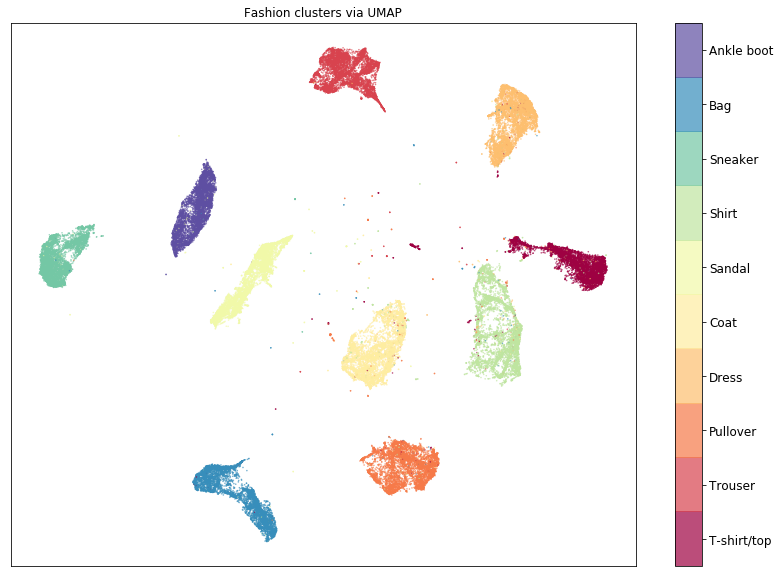

In [12]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=Y_train.head(data_number), cmap='Spectral', alpha=0.7)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=[x - 0.5 for x in range(0, 11)])
cbar.set_ticks(range(len(classes)+1))
cbar.set_ticklabels(classes)
cbar.ax.tick_params(labelsize=12)
plt.title('Fashion clusters via UMAP');

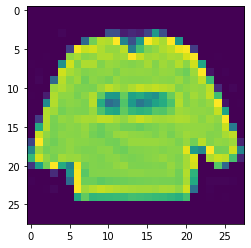

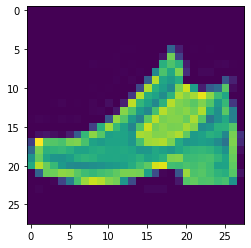

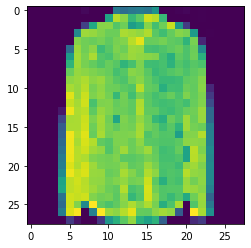

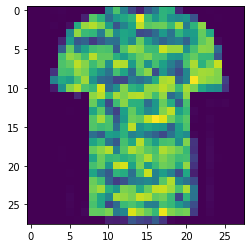

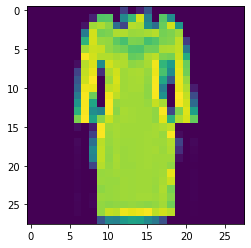

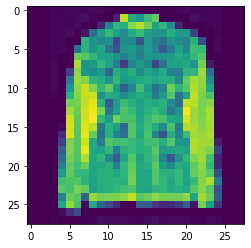

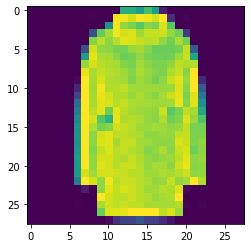

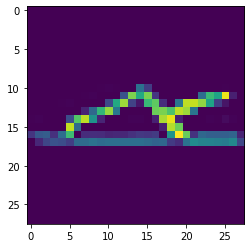

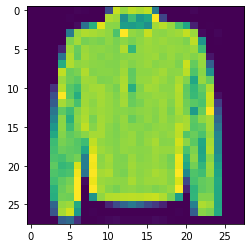

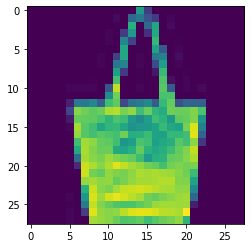

In [12]:
for i in range(10):
    image = X_train.iloc[i]
    image = numpy.array(image)
    image = image.reshape(28, 28)
    plt.subplots(1)
    plt.imshow(image);